# Breast Cancer Detection

You belong to the data team at a local research hospital. You've been tasked with
developing a means to help doctors diagnose breast cancer. You've been given data
about biopsied breast cells; where it is benign (not harmful) or malignant (cancerous).

1. What features of a cell are the largest drivers of malignancy?

2. How would a physician use your product?
3. There is a non­zero cost in time and money to collect each feature about a given
cell. How would you go about determining the most cost­effective method of
detecting malignancy?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Reading the data
bc = pd.read_csv("https://raw.githubusercontent.com/Babakjfard/Data_Challenges/master/data/breast-cancer-wisconsin.txt")

In [3]:
bc.head()

In [4]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15855 entries, 0 to 15854
Data columns (total 12 columns):
Index                          15855 non-null int64
ID                             15855 non-null int64
Clump Thickness                15855 non-null int64
Uniformity of Cell Size        15827 non-null object
Uniformity of Cell Shape       15827 non-null object
Marginal Adhesion              15827 non-null object
Single Epithelial Cell Size    15827 non-null object
Bare Nuclei                    15827 non-null object
Bland Chromatin                15827 non-null object
Normal Nucleoli                15827 non-null object
Mitoses                        15827 non-null object
Class                          15827 non-null object
dtypes: int64(3), object(9)
memory usage: 1.5+ MB


In [6]:
# Checking for different classes of our response variable
bc['Class'].value_counts()

4          15164
2            456
40           151
?             23
No idea       17
#             11
20             5
Name: Class, dtype: int64

In [7]:
# filter for proper labels, and cast other columns to int
df = bc[bc['Class'].isin(['2','4'])]

In [8]:
df.replace('?',np.nan, inplace = True)

df = df.astype('float')


/anaconda3/envs/prophet/lib/python3.6/site-packages/pandas/core/frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15620 entries, 0 to 15854
Data columns (total 12 columns):
Index                          15620 non-null float64
ID                             15620 non-null float64
Clump Thickness                15620 non-null float64
Uniformity of Cell Size        15620 non-null float64
Uniformity of Cell Shape       15620 non-null float64
Marginal Adhesion              15620 non-null float64
Single Epithelial Cell Size    15620 non-null float64
Bare Nuclei                    15604 non-null float64
Bland Chromatin                15620 non-null float64
Normal Nucleoli                15620 non-null float64
Mitoses                        15620 non-null float64
Class                          15620 non-null float64
dtypes: float64(12)
memory usage: 1.5 MB


In [10]:
df.dropna(axis=0, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15604 entries, 0 to 15854
Data columns (total 12 columns):
Index                          15604 non-null float64
ID                             15604 non-null float64
Clump Thickness                15604 non-null float64
Uniformity of Cell Size        15604 non-null float64
Uniformity of Cell Shape       15604 non-null float64
Marginal Adhesion              15604 non-null float64
Single Epithelial Cell Size    15604 non-null float64
Bare Nuclei                    15604 non-null float64
Bland Chromatin                15604 non-null float64
Normal Nucleoli                15604 non-null float64
Mitoses                        15604 non-null float64
Class                          15604 non-null float64
dtypes: float64(12)
memory usage: 1.5 MB


In [12]:
df.Class.replace(2.0,"B", inplace=True)
df.Class.replace(4.0, "M", inplace=True)

In [13]:
df.Class.value_counts()

M    15162
B      442
Name: Class, dtype: int64

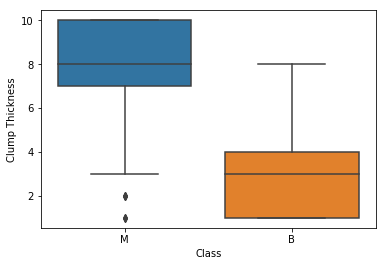

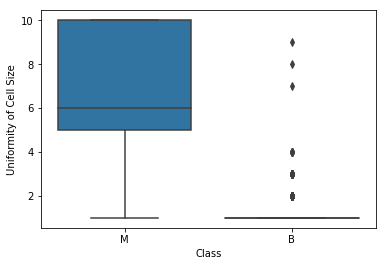

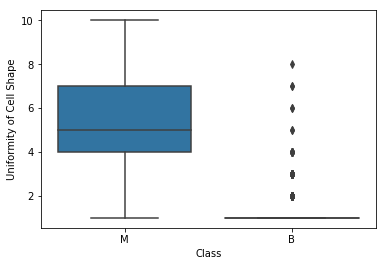

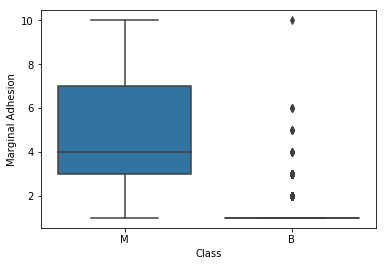

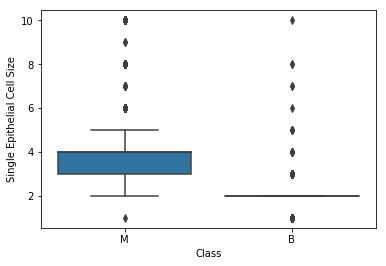

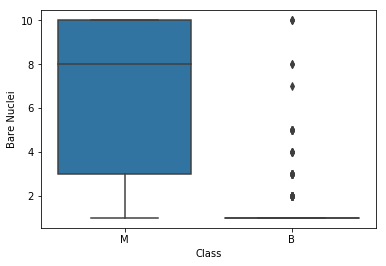

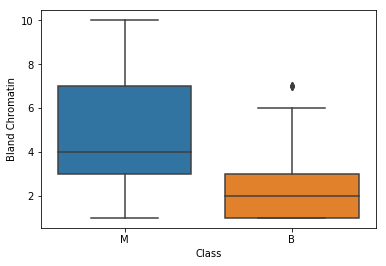

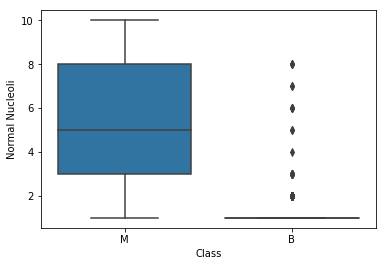

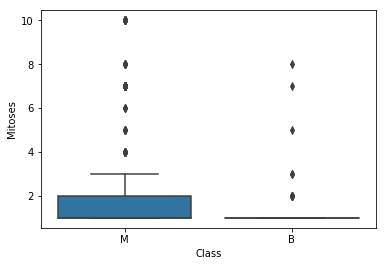

In [14]:
features = ['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses']
for i in features:
  sns.boxplot(data=df, x= 'Class', y=i)
  plt.show()

/anaconda3/envs/prophet/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 720x720 with 0 Axes>

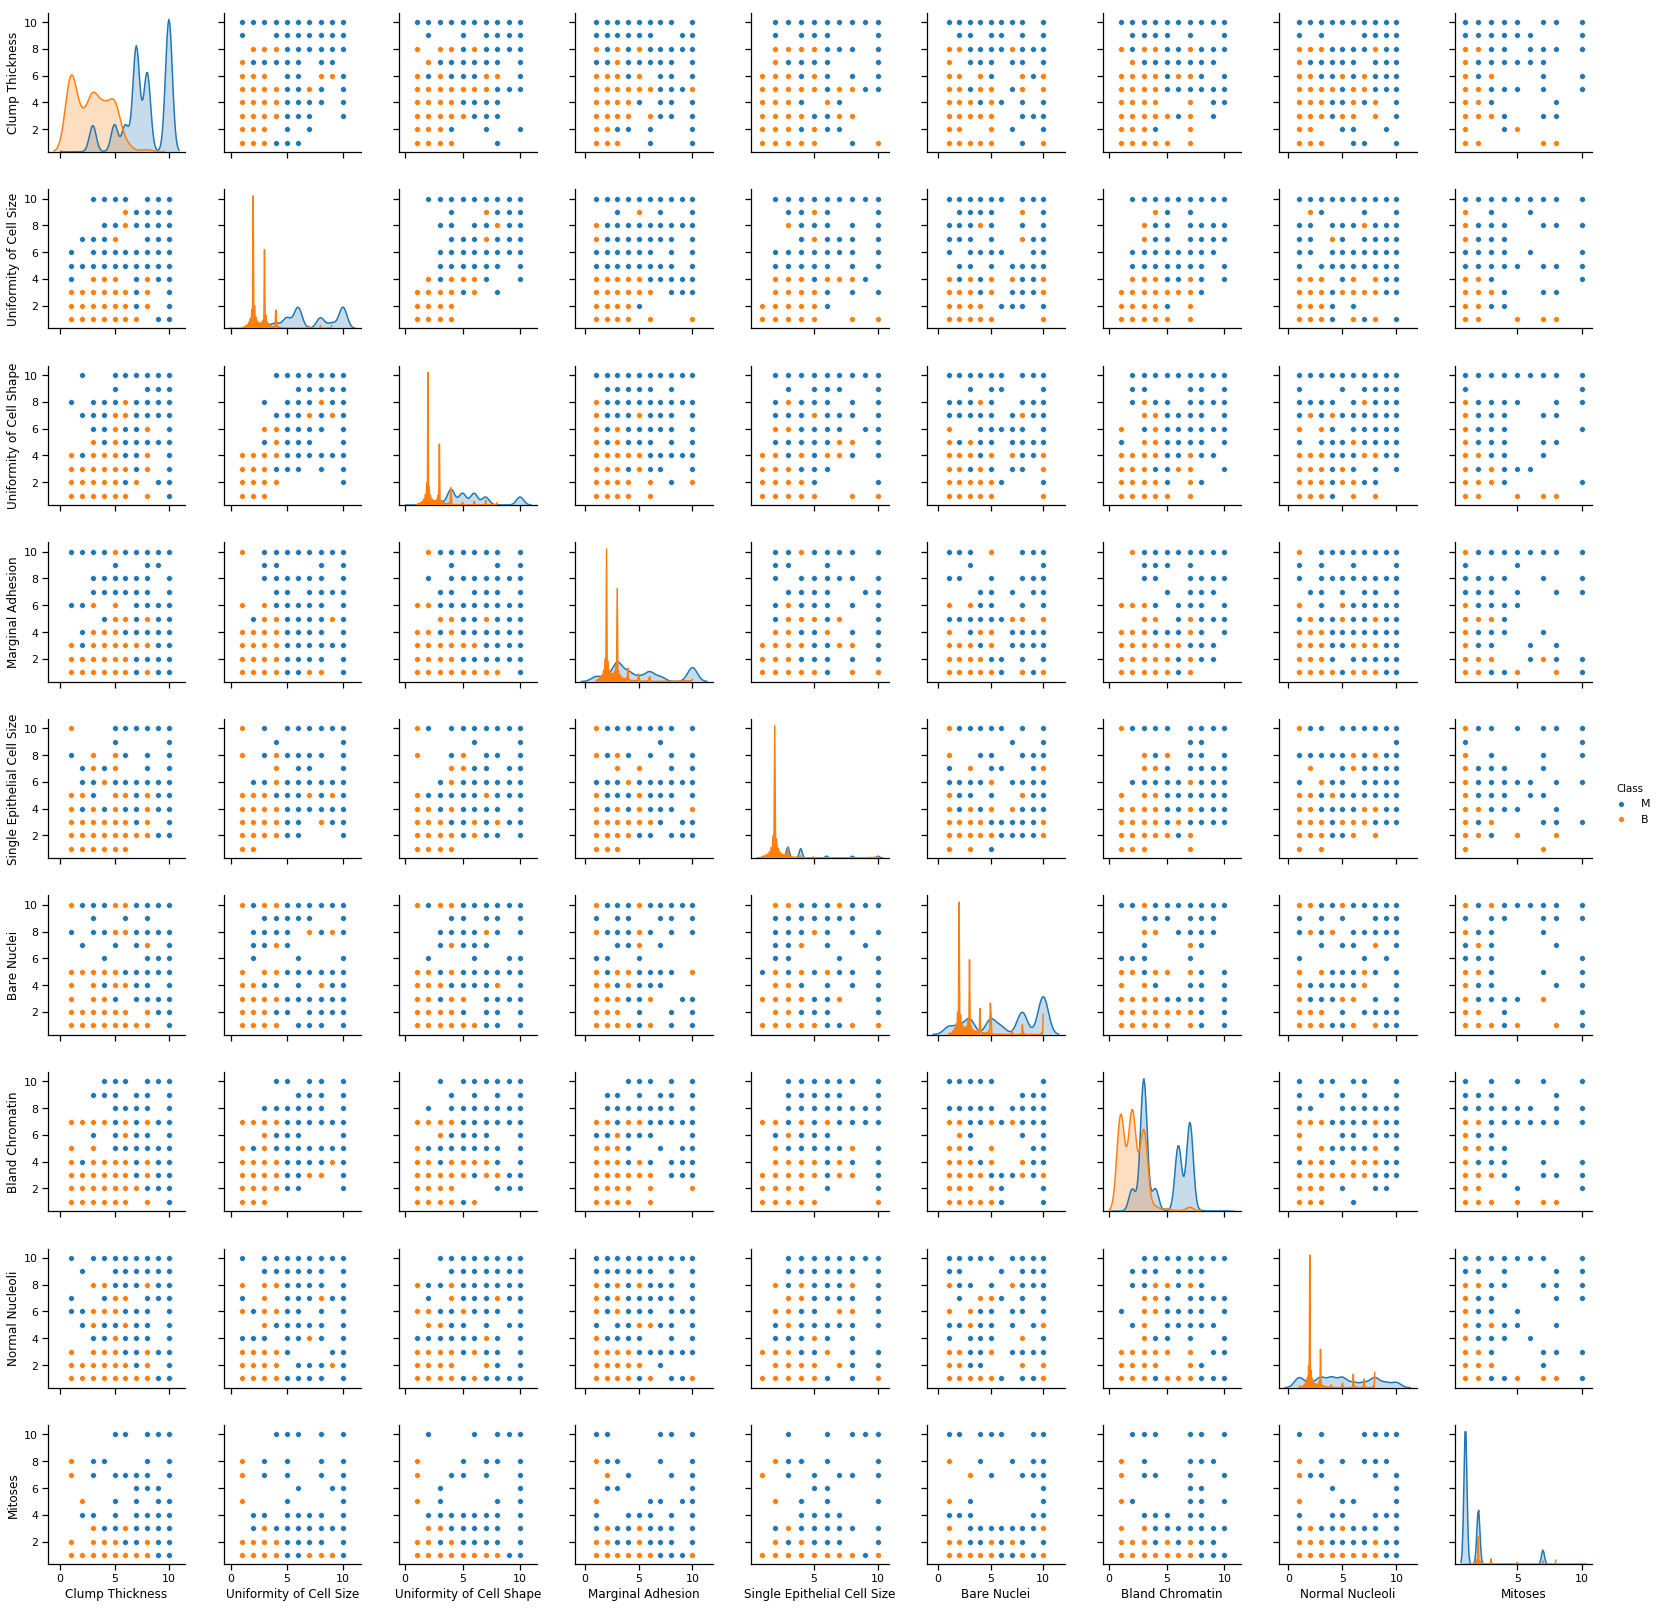

In [15]:
#for i in features:
#  for r in ['M', 'B']:
#    sns.distplot(df.loc[df.Class==r, i])
#    plt.show()
#    
sns.set_context('notebook') 
plt.figure(figsize=(10,10))
sns.pairplot(df.iloc[:, range(2,12)], hue="Class")

## Doing the Modeling
Here we have a highly unbalanced set of data. only 3% contains benign samples
### First: Without correction for minor data

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder

In [19]:
from sklearn import metrics

# split into training and test data
# y = df['Class'].values
y = df['Class'].map({'M':0.0, 'B':1.0}).values
X = df.iloc[:, range(2,11)].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# fit best model
rf = RandomForestClassifier(n_estimators = 100,
                            max_depth = None,
                            max_features = 3,
                            min_samples_split = 20,
                            bootstrap = False,
                            criterion = 'entropy',
                            random_state = 42)

#rf = RandomForestRegressor(random_state = 42)
#param_grid = {
#   'bootstrap': [True, False],
#   'max_depth': [1, 2, 3, None],
#   'max_features': [2, 3, 'auto'],
#   'min_samples_leaf': [1, 2, 5],
#   'min_samples_split': [2, 5, 10],
#   'n_estimators': [10, 20, 50, 100, 200]
#

## run grid search
#grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5)
#grid_search.fit(X_train, y_train)
#grid_search.best_params_



In [20]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
# Print the classification report
#target_names = ['quit', 'stay']
#print(metrics.classification_report(y_test, y_pred, target_names=target_names))
print('AUC:',metrics.roc_auc_score(y_test, y_pred))


AUC: 0.9883890837154932


In [21]:
# Print the classification report
target_names = ['M', 'B']
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           M       1.00      1.00      1.00      6066
           B       0.98      0.98      0.98       176

   micro avg       1.00      1.00      1.00      6242
   macro avg       0.99      0.99      0.99      6242
weighted avg       1.00      1.00      1.00      6242



## Correcting for unbalanced data

In [ ]:
# SMOTE
from imblearn.over_sampling import SMOTE, ADASYN
>>> X_resampled, y_resampled = SMOTE().fit_resample(X, y)
>>> print(sorted(Counter(y_resampled).items()))
[(0, 4674), (1, 4674), (2, 4674)]
>>> clf_smote = LinearSVC().fit(X_resampled, y_resampled)

In [22]:
# optional
#!pip install eli5
# get feature importances using permutation 
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf, random_state=42).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = df.iloc[:, range(2,11)].columns.tolist())

ModuleNotFoundError: No module named 'eli5'

In [136]:
# optional install if needed
#!pip install pdpbox
from pdpbox import pdp, info_plots

# see impact of salary
pdp_ = pdp.pdp_isolate(model=rf, dataset=pd.DataFrame(X_test), model_features=df.iloc[:, range(2,11)].columns.tolist(), feature='Uniformity of Cell Shape')
pdp.pdp_plot(pdp_, 'Uniformity of Cell Shape')
plt.show()

ValueError: ignored

In [ ]:
# see impact of salary
pdp_ = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=X_test.columns.tolist(), feature='salary')

# plot it
pdp.pdp_plot(pdp_, 'salary')
plt.show()

In [ ]:
# impact of time vs salary
features_to_plot = ['time_at_Co', 'salary']
inter_ = pdp.pdp_interact(model=rf, dataset=X_test, model_features=X_test.columns.tolist(), features=features_to_plot)
# grid
pdp.pdp_interact_plot(pdp_interact_out=inter_, feature_names=features_to_plot, plot_type='grid')
plt.show()